In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv('GOTO.JK.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-11,400.0,416.0,372.0,382.0,382.0,9410897000
1,2022-04-12,422.0,442.0,360.0,370.0,370.0,3887331000
2,2022-04-13,370.0,380.0,360.0,374.0,374.0,3262811400
3,2022-04-14,374.0,382.0,374.0,376.0,376.0,3675981900
4,2022-04-18,376.0,380.0,370.0,378.0,378.0,2660312700
...,...,...,...,...,...,...,...
564,2024-08-20,54.0,55.0,53.0,53.0,53.0,2776781200
565,2024-08-21,53.0,55.0,52.0,53.0,53.0,3026388200
566,2024-08-22,53.0,53.0,51.0,52.0,52.0,1177448900
567,2024-08-23,51.0,53.0,51.0,53.0,53.0,994970600


In [28]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2022-04-11,382.0
1,2022-04-12,370.0
2,2022-04-13,374.0
3,2022-04-14,376.0
4,2022-04-18,378.0
...,...,...
564,2024-08-20,53.0
565,2024-08-21,53.0
566,2024-08-22,52.0
567,2024-08-23,53.0


In this section I only take date and close data, the data I get is quite neat so there is not too much cleaning process.

In [29]:
df['Date']

,Date
0,2022-04-11
1,2022-04-12
2,2022-04-13
3,2022-04-14
4,2022-04-18
...,...
564,2024-08-20
565,2024-08-21
566,2024-08-22
567,2024-08-23


In [30]:
# Fungsi untuk mengubah string ke datetime object
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2022-04-11')
datetime_object

datetime.datetime(2022, 4, 11, 0, 0)

In [31]:
df

,Date,Close
0,2022-04-11,382.0
1,2022-04-12,370.0
2,2022-04-13,374.0
3,2022-04-14,376.0
4,2022-04-18,378.0
...,...,...
564,2024-08-20,53.0
565,2024-08-21,53.0
566,2024-08-22,52.0
567,2024-08-23,53.0


In [32]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-32-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


,Date
0,2022-04-11
1,2022-04-12
2,2022-04-13
3,2022-04-14
4,2022-04-18
...,...
564,2024-08-20
565,2024-08-21
566,2024-08-22
567,2024-08-23


In [33]:
df.index = df.pop('Date')
df

,Close
Date,
2022-04-11,382.0
2022-04-12,370.0
2022-04-13,374.0
2022-04-14,376.0
2022-04-18,378.0
...,...
2024-08-20,53.0
2024-08-21,53.0
2024-08-22,52.0


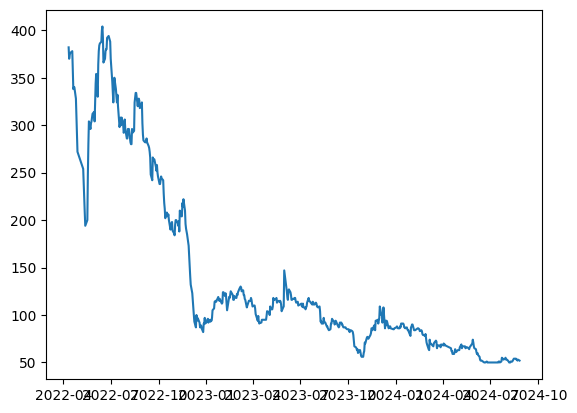

In [34]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [40]:
# Fungsi untuk membuat windowed DataFrame
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):

  # Mengonversi string tanggal ke format datetime
    first_date = pd.to_datetime(first_date_str)
    last_date = pd.to_datetime(last_date_str)

     # Filter dataframe berdasarkan rentang tanggal
    dataframe = dataframe.loc[first_date:last_date]

    # Siapkan list kosong untuk menyimpan data
    dates = []
    X, Y = [], []

    # Loop untuk membuat window (jendela) bergulir pada dataframe
    for end_date in dataframe.index[n:]:
        start_date = end_date - pd.Timedelta(days=n)
        df_subset = dataframe.loc[start_date:end_date]

        # Memastikan bahwa window berisi jumlah data yang cukup
        if len(df_subset) < n + 1:
            print(f'Error: Window of size {n} is too large for date {end_date}')
            continue

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(end_date)
        X.append(x)
        Y.append(y)

    # Membuat DataFrame hasil
    ret_df = pd.DataFrame({
        'Target Date': dates,
        'Target': Y
    })

    # Menambahkan data windowed ke DataFrame
    X = np.array(X)
    for i in range(n):
        ret_df[f'Target-{n-i}'] = X[:, i]

    return ret_df

# Contoh penggunaan df_to_windowed_df
windowed_df = df_to_windowed_df(df, '2022-04-11', '2024-08-26', n=3)
print(windowed_df)


Error: Window of size 3 is too large for date 2022-04-18 00:00:00
Error: Window of size 3 is too large for date 2022-04-19 00:00:00
Error: Window of size 3 is too large for date 2022-04-20 00:00:00
Error: Window of size 3 is too large for date 2022-04-25 00:00:00
Error: Window of size 3 is too large for date 2022-04-26 00:00:00
Error: Window of size 3 is too large for date 2022-04-27 00:00:00
Error: Window of size 3 is too large for date 2022-05-09 00:00:00
Error: Window of size 3 is too large for date 2022-05-10 00:00:00
Error: Window of size 3 is too large for date 2022-05-11 00:00:00
Error: Window of size 3 is too large for date 2022-05-17 00:00:00
Error: Window of size 3 is too large for date 2022-05-18 00:00:00
Error: Window of size 3 is too large for date 2022-05-19 00:00:00
Error: Window of size 3 is too large for date 2022-05-23 00:00:00
Error: Window of size 3 is too large for date 2022-05-24 00:00:00
Error: Window of size 3 is too large for date 2022-05-25 00:00:00
Error: Win

df_to_windowed_df function, which aims to convert time series data into windowed data for predictive analysis, such as in regression models or machine learning.

This function accepts four parameters: dataframe, first_date_str, last_date_str, and n. The dataframe parameter is a DataFrame that contains time series data with an index of date. first_date_str and last_date_str are strings that indicate the date range to be used, and n is the window size, which is the number of previous days that will be used as a feature to predict the closing price (e.g., stock price) on a given day.

The function first converts the date strings first_date_str and last_date_str into datetime objects using pd.to_datetime, and then filters the dataframe according to the date range. Next, the function creates rolling windows on the DataFrame, with each window consisting of n previous data used to predict the values on the target date. These values are stored in two lists: X for the window data (features) and Y for the prediction target.

If the window size is too large and there is not enough data available, the function will display an error message and proceed to the next window. After the entire window is formed, the function creates a new DataFrame with the target date, target value, and features formed from the previous values. This data is then returned as output.

In [41]:
# Fungsi untuk mengonversi windowed DataFrame menjadi tuple (dates, X, Y)
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0] # Mengambil kolom tanggal

  middle_matrix = df_as_np[:, 1:-1] # Mengambil data fitur (X)
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1)) # Mengubah bentuk agar sesuai dengan input model

  Y = df_as_np[:, -1] # Mengambil kolom target (Y)

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((195,), (195, 3, 1), (195,))

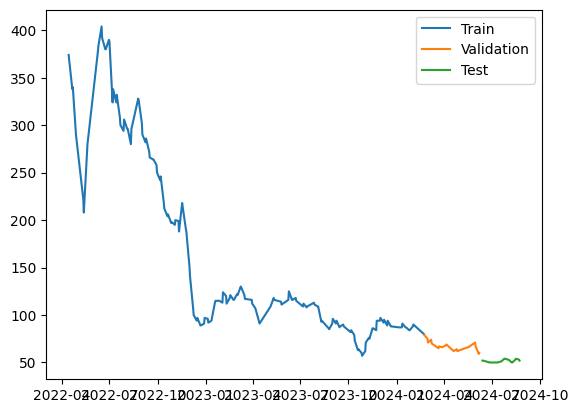

In [42]:
# Mengonversi windowed DataFrame menjadi data pelatihan (train), validasi (validation), dan pengujian (test)
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

The code above divides the dataset into three parts: train, validation, and test data, and then visualizes each part using a line plot.

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error']) # Kompilasi model dengan loss MSE dan optimizer Adam

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100) # Melatih model pada data pelatihan dan validasi

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 35926.4180 - mean_absolute_error: 163.5597 - val_loss: 4501.2222 - val_mean_absolute_error: 66.9030
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 35376.0234 - mean_absolute_error: 162.6460 - val_loss: 4442.9688 - val_mean_absolute_error: 66.4662
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 34833.8086 - mean_absolute_error: 161.7975 - val_loss: 4383.4595 - val_mean_absolute_error: 66.0165
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 35908.0156 - mean_absolute_error: 164.3579 - val_loss: 4313.4883 - val_mean_absolute_error: 65.4834
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 35995.3945 - mean_absolute_error: 163.5455 - val_loss: 4226.6870 - val_mean_absolute_error: 64.8165
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 37546.2461 - mean_absolute_error: 165.9526 - val_loss: 4113.2280 - val_mean_absolute_error: 63.9333
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - 

The above code creates and trains a neural network model using Keras to predict values from time series data. The model is built with a Sequential architecture, which consists of multiple layers:

The Input layer accepts data of the form (3, 1), which means there are 3 features with 1 value per feature.
An LSTM layer with 64 units is used to capture the temporal dependencies in the time series data.
Two Dense layers with 32 units and ReLU activation act as fully connected layers to learn non-linear patterns.
The last Dense layer with 1 unit generates a single prediction.
The model was compiled with loss function mse (mean squared error), Adam optimizer with learning rate 0.001, and performance was measured using mean_absolute_error metric. Finally, the model was trained (fit) on training data (X_train, y_train) with validation using validation data (X_val, y_val) for 100 epochs.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


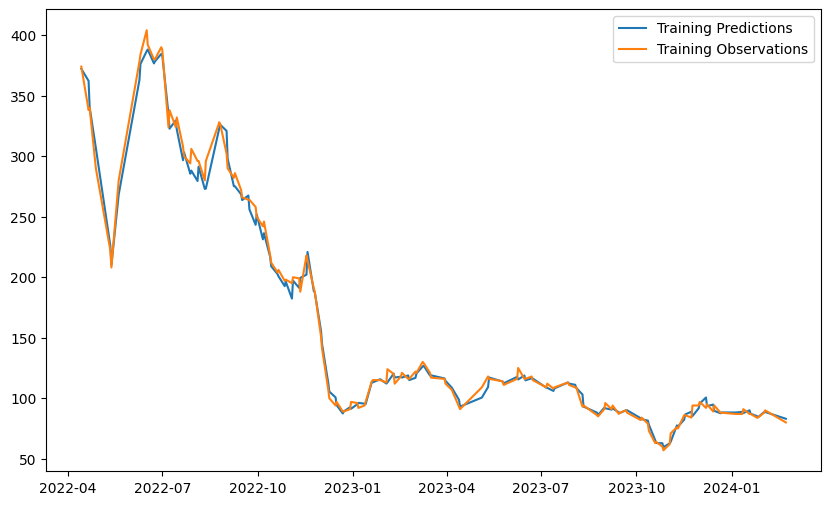

In [44]:
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(10, 6))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

The model is used to predict the values of the training data (X_train), and the results are flattened into a one-dimensional array.
A plot is created to compare the model predictions (train_predictions) with the actual observed values (y_train) over the time span of the training data (dates_train).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


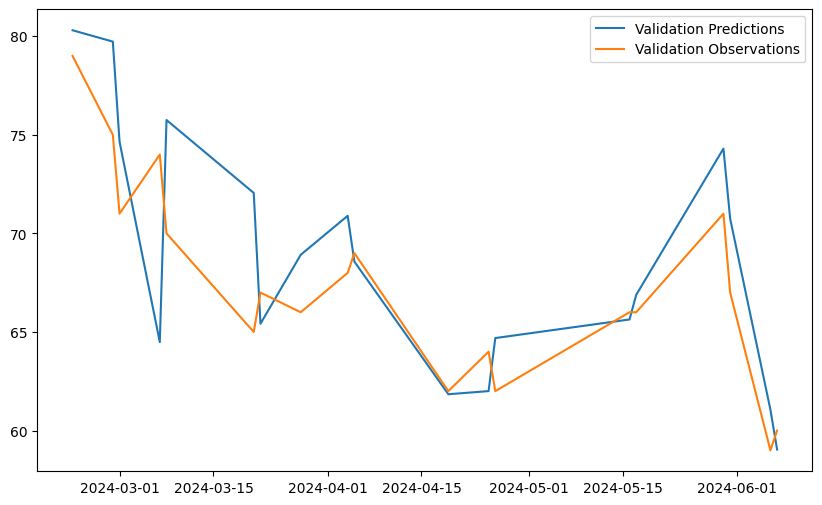

In [45]:
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize=(10, 6))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

The model is used to predict the value of the validation data (X_val).
A plot is created to compare the model predictions (val_predictions) with the actual observed values (y_val) over the time span of the validation data (dates_val).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


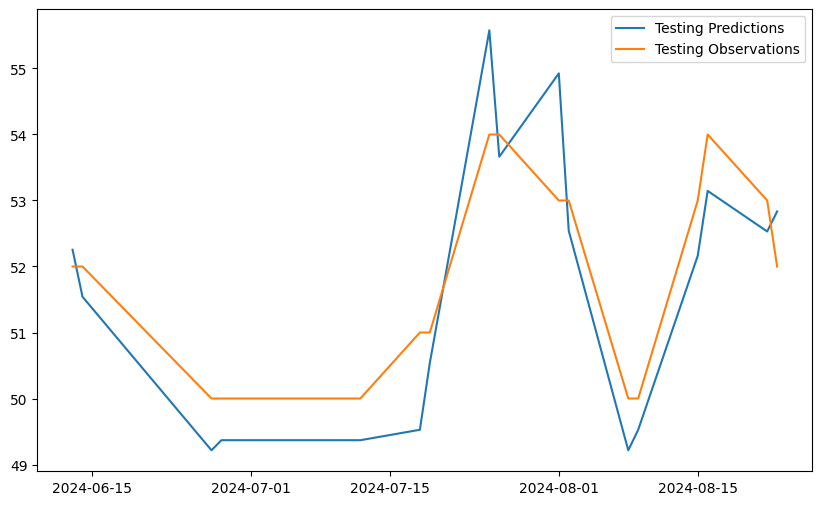

In [46]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(10, 6))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

The model is used to predict the value of the test data (X_test).
A plot is created to compare the model predictions (test_predictions) with the actual observed values (y_test) over the time span of the test data (dates_test).

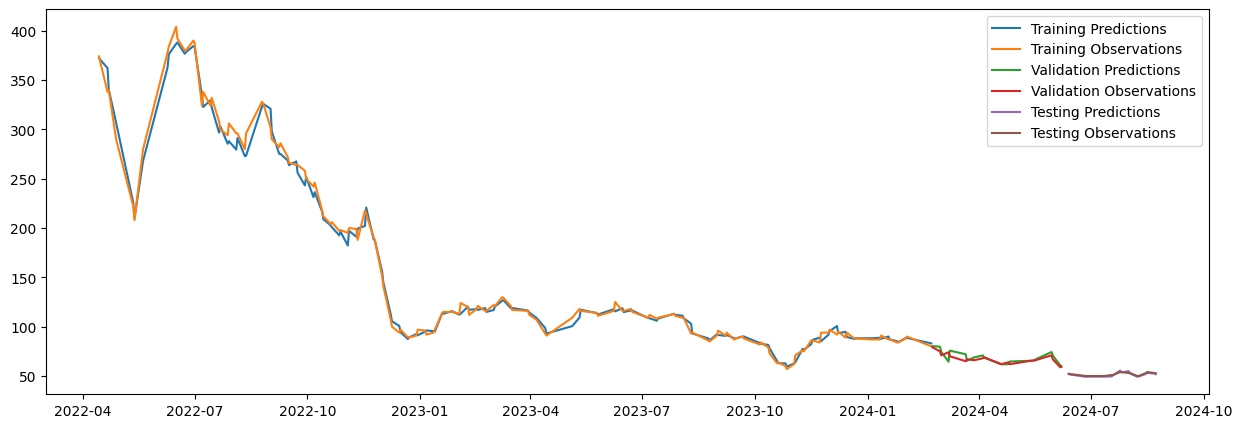

In [47]:
plt.figure(figsize=(15, 5))

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [64]:
def predict_future(model, X_input, n_future=20): # Fungsi untuk memprediksi harga di masa depan berdasarkan input X terakhir
    predictions = []
    current_input = X_input

    for _ in range(n_future):
        pred = model.predict(current_input[np.newaxis, :, :])[0, 0] # Prediksi harga untuk hari berikutnya
        predictions.append(pred)
        current_input = np.append(current_input[1:], pred).reshape(-1, 1)
    return predictions # Perbarui input untuk prediksi berikutnya

X_last_input = X_test[-1] # Mengambil input terakhir dari data pengujian untuk memprediksi harga masa depan

future_predictions = predict_future(model, X_last_input, n_future=20) # Memprediksi harga untuk 20 hari ke depan

future_dates = pd.date_range(start=dates_test[-1], periods=21, freq='D')[1:] # Membuat rentang tanggal untuk prediksi masa depan

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


The predict_future function is used to predict future values based on the last input (X_last_input).
The model is given the current input (current_input), and predictions are generated for each step forward.
The input is updated with the latest prediction, and this process is repeated until n_future predictions are generated.
The future predictions for 30 days are stored in future_predictions, with the dates generated by pd.date_range, starting from the last day of test data.

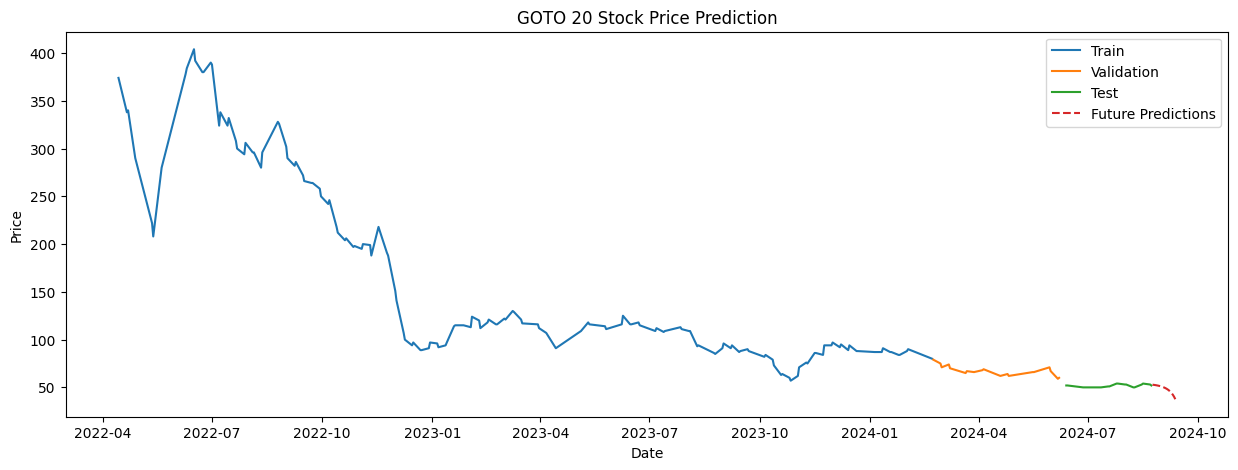

In [67]:
# Visualisasi hasil prediksi masa depan
plt.figure(figsize=(15, 5))

plt.plot(dates_train, y_train, label='Train')
plt.plot(dates_val, y_val, label='Validation')
plt.plot(dates_test, y_test, label='Test')

plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GOTO 20 Stock Price Prediction')
plt.legend()
plt.show()

This code aims to create a composite plot that displays the prediction results of the LSTM model along with the actual data, both for training, validation, testing, and future prediction data.

In [65]:
future_predictions

[52.83387,
 52.6455,
 52.456795,
 52.244984,
 52.002903,
 51.729073,
 51.419056,
 51.066494,
 50.664,
 50.20263,
 49.671146,
 49.055313,
 48.336723,
 47.491127,
 46.48571,
 45.27462,
 43.84532,
 42.15874,
 40.104153,
 37.605145]

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prediksi pada data pengujian
y_pred = model.predict(X_test)

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Mean Squared Error (MSE): 0.7491177320480347
Root Mean Squared Error (RMSE): 0.8655158877372742
Mean Absolute Error (MAE): 0.7572273015975952


In [69]:
# Prediksi pada data pelatihan
y_train_pred = model.predict(X_train)
# Prediksi pada data validasi
y_val_pred = model.predict(X_val)

# Metrik untuk data pelatihan
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Metrik untuk data validasi
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, y_val_pred)

print(f'Train MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}')
print(f'Validation MSE: {mse_val}, RMSE: {rmse_val}, MAE: {mae_val}')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Train MSE: 43.207496643066406, RMSE: 6.573240756988525, MAE: 4.487236499786377
Validation MSE: 14.341933250427246, RMSE: 3.787074565887451, MAE: 2.9463207721710205


Based on the machine learning model created, we can conclude that Goto shares will experience a significant decline in the future, but the results of this prediction may not be accurate, it all depends on the state of the stock market.